# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [36]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
form_df = pd.read_csv("pets.csv")
print(form_df)




   birth_month       state   pet
0          Feb          NY  Dogs
1          Mar          CA  Cats
2          Aug          TX  Dogs
3          May         NaN  Cats
4          Oct  California  Dogs
5          Jun          NY  Cats
6          Dec          MA  Dogs
7          Feb  California  Cats
8          Apr          FL  Dogs
9          Jul         NaN  Cats
10         Jan         NaN  Dogs
11         Nov          FL  Cats


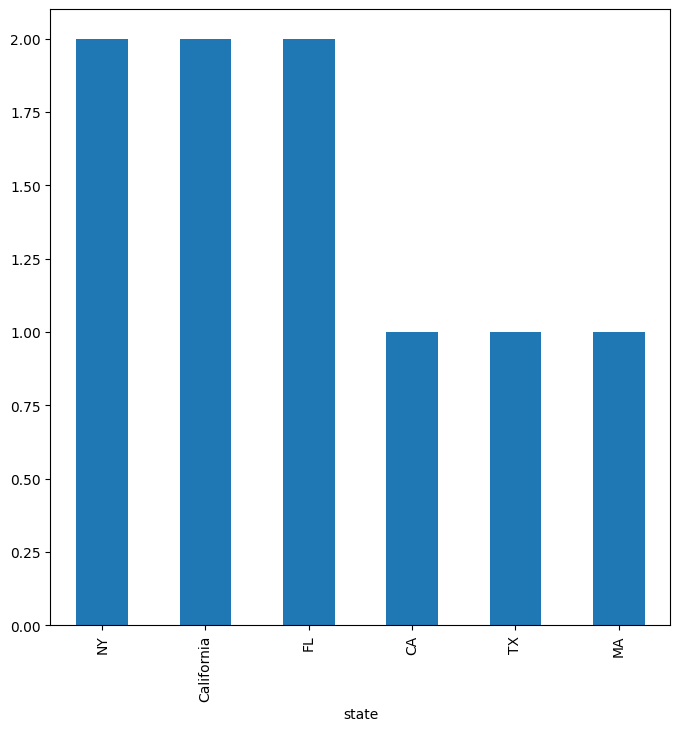

In [38]:
form_df['state'].value_counts().plot(kind='bar', figsize=(8,8));
plt.show()

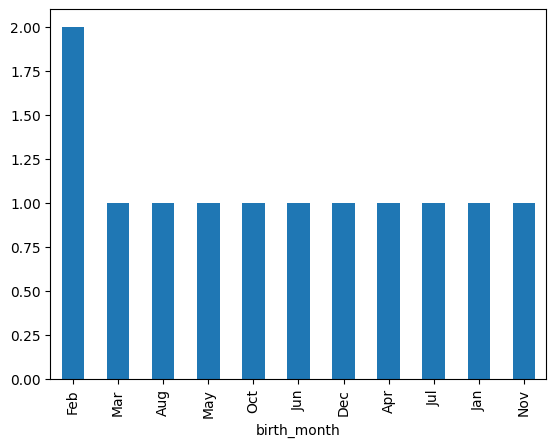

In [39]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

# Solutions:
# Recommendations

### 1. Standardize Input:

In [40]:
# Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
# Loading the dataset
form_df = pd.read_csv("pets.csv")
print(form_df)


   birth_month       state   pet
0          Feb          NY  Dogs
1          Mar          CA  Cats
2          Aug          TX  Dogs
3          May         NaN  Cats
4          Oct  California  Dogs
5          Jun          NY  Cats
6          Dec          MA  Dogs
7          Feb  California  Cats
8          Apr          FL  Dogs
9          Jul         NaN  Cats
10         Jan         NaN  Dogs
11         Nov          FL  Cats


In [42]:
# See the five entries
form_df.head()

,birth_month,state,pet
0,Feb,NY,Dogs
1,Mar,CA,Cats
2,Aug,TX,Dogs
3,May,NaN,Cats
4,Oct,California,Dogs


In [43]:
# See the last five entries
form_df.tail()

,birth_month,state,pet
7,Feb,California,Cats
8,Apr,FL,Dogs
9,Jul,NaN,Cats
10,Jan,NaN,Dogs
11,Nov,FL,Cats


In [44]:
form_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   birth_month  12 non-null     object
 1   state        9 non-null      object
 2   pet          12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes


#### 2. Convert all state abbreviations to full names

In [45]:
# Converting all the state names abbreviations to full name
full_name = {"CA": "California", "AK": "Alaska", "RI": "Rhode Island", "FL": "Florida"}
form_df['state'] = form_df['state'].map(full_name).fillna(form_df['state'])

In [46]:
print(form_df)

   birth_month       state   pet
0          Feb          NY  Dogs
1          Mar  California  Cats
2          Aug          TX  Dogs
3          May         NaN  Cats
4          Oct  California  Dogs
5          Jun          NY  Cats
6          Dec          MA  Dogs
7          Feb  California  Cats
8          Apr     Florida  Dogs
9          Jul         NaN  Cats
10         Jan         NaN  Dogs
11         Nov     Florida  Cats



#### 3. Convert all months abbreviations to full names

In [47]:
# Converting to title Case
form_df['birth_month'] = form_df['birth_month'].str.title()

# Converting all the months abbreviations to full name
months = {'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May', 'Jun': 'June', 'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'}
months['birth_month'] = form_df['birth_month'].map(months).fillna(form_df['birth_month'])


In [48]:
print(form_df)

   birth_month       state   pet
0          Feb          NY  Dogs
1          Mar  California  Cats
2          Aug          TX  Dogs
3          May         NaN  Cats
4          Oct  California  Dogs
5          Jun          NY  Cats
6          Dec          MA  Dogs
7          Feb  California  Cats
8          Apr     Florida  Dogs
9          Jul         NaN  Cats
10         Jan         NaN  Dogs
11         Nov     Florida  Cats


### 4. Handle missing value

In [49]:
# Drop rows with NaN values
form_df = form_df.dropna(subset=['state'])

In [50]:
print(form_df)

   birth_month       state   pet
0          Feb          NY  Dogs
1          Mar  California  Cats
2          Aug          TX  Dogs
4          Oct  California  Dogs
5          Jun          NY  Cats
6          Dec          MA  Dogs
7          Feb  California  Cats
8          Apr     Florida  Dogs
11         Nov     Florida  Cats


### 5.  Re-plot Visualizations

###  Visualize counts of states

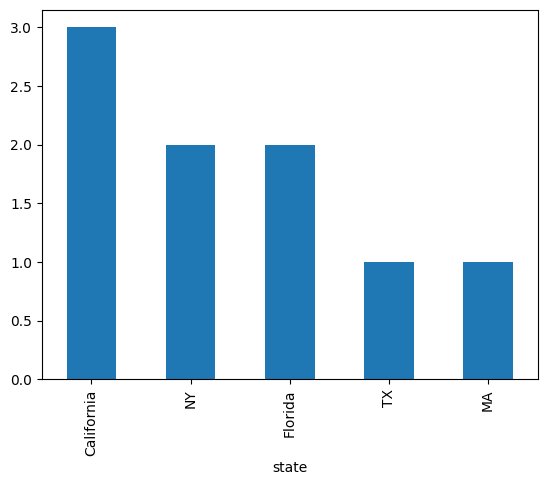

In [51]:
form_df['state'].value_counts().plot(kind='bar')
plt.show()

### Visualize counts of birth months

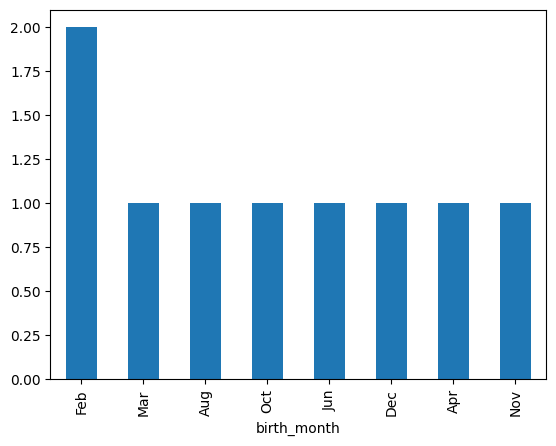

In [52]:
form_df['birth_month'].value_counts().plot(kind='bar')
plt.show()